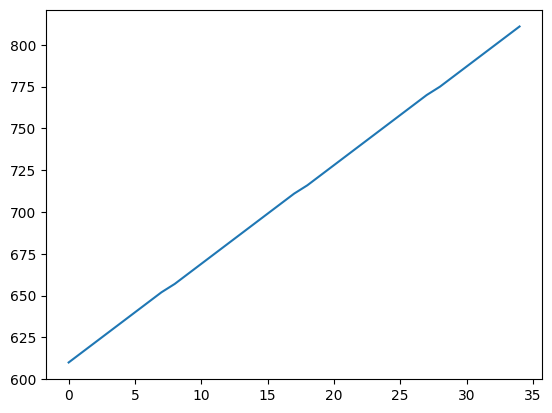

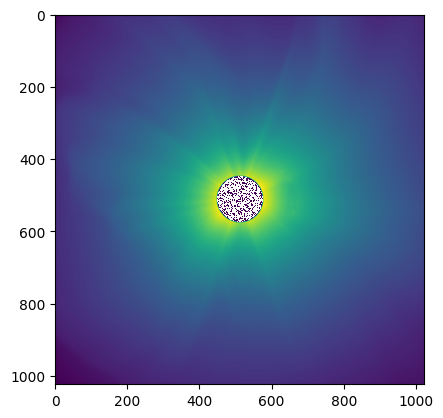

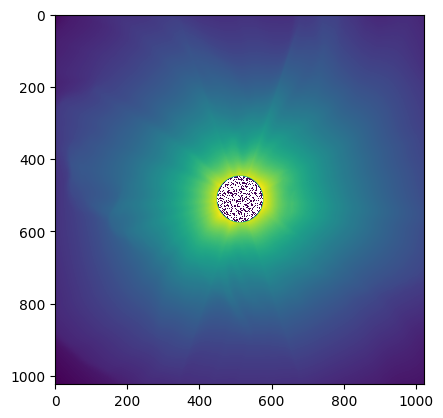

(1024, 1024)
Processing subtraction for image  0
Processing subtraction for image  1
Processing subtraction for image  2
Processing subtraction for image  3
Processing subtraction for image  4
Processing subtraction for image  5
Processing subtraction for image  6
Processing subtraction for image  7
Processing subtraction for image  8
Processing subtraction for image  9
Processing subtraction for image  10
Processing subtraction for image  11
Processing subtraction for image  12
Processing subtraction for image  13
Processing subtraction for image  14
Processing subtraction for image  15
Processing subtraction for image  16
Processing subtraction for image  17
Processing subtraction for image  18
Processing subtraction for image  19
Processing subtraction for image  20
Processing subtraction for image  21
Processing subtraction for image  22
Processing subtraction for image  23
Processing subtraction for image  24
Processing subtraction for image  25
Processing subtraction for image  2

c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:18: RuntimeWarning: divide by zero encountered in divide
  pBratioFull = image_data_pB/image_data_tB
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:18: RuntimeWarning: invalid value encountered in divide
  pBratioFull = image_data_pB/image_data_tB
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:36: RuntimeWarning: invalid value encountered in sqrt
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:37: RuntimeWarning: invalid value encountered in sqrt
  angleMatrixNegative[i][j] = epsilon + np.rad2deg(np.arcsin(-np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:36: RuntimeWarning: invalid value encountered in arcsin
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\U

Processing calculations for image  1
Processing calculations for image  2
Processing calculations for image  3
Processing calculations for image  4
Processing calculations for image  5
Processing calculations for image  6
Processing calculations for image  7
Processing calculations for image  8
Processing calculations for image  9
Processing calculations for image  10
Processing calculations for image  11
Processing calculations for image  12
Processing calculations for image  13
Processing calculations for image  14
Processing calculations for image  15
Processing calculations for image  16
Processing calculations for image  17
Processing calculations for image  18


c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  angleMatrixNegative[i][j] = epsilon + np.rad2deg(np.arcsin(-np.sqrt((1 - pBratio)/(1 + pBratio))))


Processing calculations for image  19
Processing calculations for image  20
Processing calculations for image  21
Processing calculations for image  22
Processing calculations for image  23
Processing calculations for image  24
Processing calculations for image  25
Processing calculations for image  26
Processing calculations for image  27
Processing calculations for image  28
Processing calculations for image  29
Processing calculations for image  30
Processing calculations for image  31
Processing calculations for image  32
Processing calculations for image  33
Processing calculations for image  34


In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit


# Array of the front of the CME through human analysis
# A linear fit is applied to the data to interpolate the front at each time step

#original
front_array_absolute = [[512,608],[512,640],[512,671],[512,702],[512,730],[512,761],[512,783]]

# +50
# front_array_absolute = [[512,428],[512,397],[512,365],[512,335],[512,300],[512,265],[512,230]]

# -10
# front_array_absolute = [[512,413],[512,392],[512,356],[512,330],[512,304],[512,275],[512,252]]

#                                                           
front_array_absolute = np.array(front_array_absolute)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), front_array_absolute[:,1])
front_array_absolute = np.zeros((35,2), dtype=int)
front_array_absolute[:,0] = np.full(35, 512)
front_array_absolute[:,1] = np.floor((linearFunc(np.arange(15,50), *parameters)))


# Plot the front of the CME as a function of timestep
plt.figure()
plt.plot(front_array_absolute[:,1])
plt.show()


# Define the region of interest depending on where the CME is located

# xMin = 0
# xMax = 500
xMin = 500
xMax = 1000

yMin = 250
yMax = 750

pBdata = []
tBdata =[]

for i in range(15,50,1):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

kernel_size = 5
kernel = np.full((kernel_size, kernel_size), 1/(kernel_size*kernel_size))

# allIndices = calculateRadialBands(pBdata[0],direction='left')

# print(allIndices)

# for i in range(len(pBdata)):
#     pBdata[i] = signal.convolve2d(pBdata[i], kernel, mode='same', boundary='fill')
#     tBdata[i] = signal.convolve2d(tBdata[i], kernel, mode='same', boundary='fill')
pBdataSubtract = medianOverTime(pBdata)
tBdataSubtract = medianOverTime(tBdata)

plt.figure()
plt.imshow(pBdataSubtract, norm=LogNorm())
plt.figure()
plt.imshow(tBdataSubtract, norm=LogNorm())
plt.show()
print(np.array(pBdata).shape)
print(pBdataSubtract.shape)


for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)

    #choose subtraction method 

    #Radial median subtraction:

    # median_values_pb, r_values = calculateMedianPixelValues(pBdata[i],allIndices)
    # median_values_tb, r_values = calculateMedianPixelValues(tBdata[i],allIndices)
    # pBdata[i] = subtractRadialMedian(pBdata[i], median_values_pb)   
    # tBdata[i] = subtractRadialMedian(tBdata[i],median_values_tb)  
    
  
    # Function fit subtraction:
    # pBdata[i] = functionFitSubtract(pBdata[i], front_array_absolute[i,:], 'right')
    # tBdata[i] = functionFitSubtract(tBdata[i], front_array_absolute[i,:], 'right')

    pBdata[i] = pBdata[i] - pBdataSubtract
    tBdata[i] = tBdata[i] - tBdataSubtract
    
    

# Calculate the exit angles for each pixel in the region of interest
for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat = calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax))
    posMats[i] = posMat
    negMats[i] = negMat

C:\Users\glenn\AppData\Local\Temp\ipykernel_28388\3630421692.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g+" (-> color='g'). The keyword argument will take precedence.
  axs[2,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'g+', color='lime')


[24.66164483 26.08045853 27.20586958 27.91235993 28.4859729  27.9410993
 27.12764527 25.48145176 23.93086896 24.69179283 27.33218112 32.39986233
 32.7894924  33.8499369  34.27833853 34.87160767 35.25103411 36.05219143
 36.40161703 37.2067982  37.07052251 37.88938998 37.93789493 39.07992213
 39.17579856 40.149312   40.69670529 41.21260173 41.91396526 42.2227361
 42.92064301 43.50141752 44.15576584 44.75705145 45.40495269]
[-7.43508233 -7.79920853 -7.86993208 -7.52173493 -7.0406604  -5.4410993
 -3.57295777 -0.87207676  1.55741229  1.85117592  0.26547513 -3.74751858
 -3.08246115 -3.08821815 -2.46193228 -2.00051392 -1.32525286 -1.07172268
 -0.54224203 -0.2927357   0.89822749  1.13404752  2.14023007  2.05289037
  3.01170144  3.0928755   3.60016971  4.13896077  4.31650349  5.06242015
  5.41920074  5.89311373  6.29345291  6.7468548   7.15364106]
pos m:  0.6320963712174501
pos b:  24.169816048999472
pos mean:  34.91545435969613
pos sigma: 6.603654414558628
neg m:  0.4049145268917931
neg b:  -6

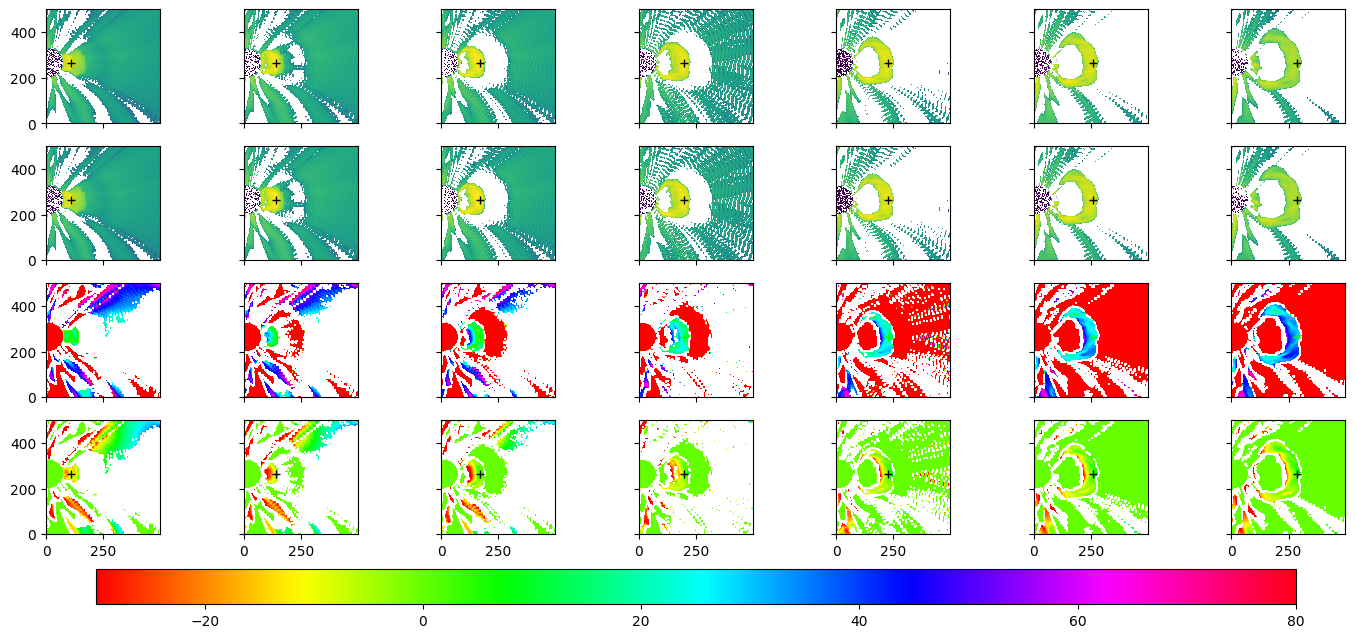

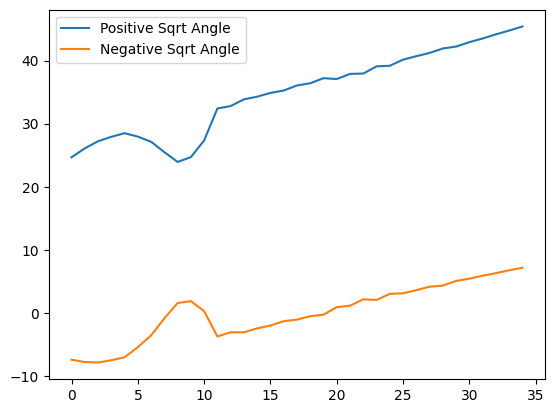

In [6]:
# xMin = 0
# xMax = 500
xMin = 500
xMax = 1000

yMin = 250
yMax = 750


vmin = -30
vmax = 80

front_array_adj = front_array_absolute - np.array([yMin,xMin])
#plot the images with the front of the CME marked

fig, axs = plt.subplots(4,7,figsize=(15, 7), sharex=True, sharey=True)

for i in range(7): 
    
    axs[0,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    axs[1,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    axs[2,i].imshow(posMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmax=vmax, cmap='hsv')
    im = axs[3,i].imshow(negMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')



for i in range(7):
    axs[0,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')
    axs[1,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')
    axs[2,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'g+', color='lime')
    axs[3,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')


xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
print(posMatsGraph)
print(negMatsGraph)

posCoef = np.polyfit(np.arange(0,35),posMatsGraph,1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(posMatsGraph))
print("pos sigma:", np.std(posMatsGraph))



negCoef = np.polyfit(np.arange(0,35),negMatsGraph,1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(negMatsGraph))
print("neg sigma:", np.std(negMatsGraph))
# poly1d_fn = np.poly1d(posCoef) 


plt.figure()   
plt.plot(posMatsGraph, label='Positive Sqrt Angle')
plt.plot(negMatsGraph, label='Negative Sqrt Angle') 
plt.legend() 
plt.show()

In [7]:

print(front_array_adj[2])
print(posMatsData[2][front_array_adj[2][0],front_array_adj[2][1]])

[262 122]
0.0
